In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import numpy as np


from tools.scene.coordinate_system_3d import CoordinateSystem3D
from tools.scene.box_node_3d import BoxNode3D
import matplotlib.pyplot as plt
from tools.transforms.affine.transforms3d import *

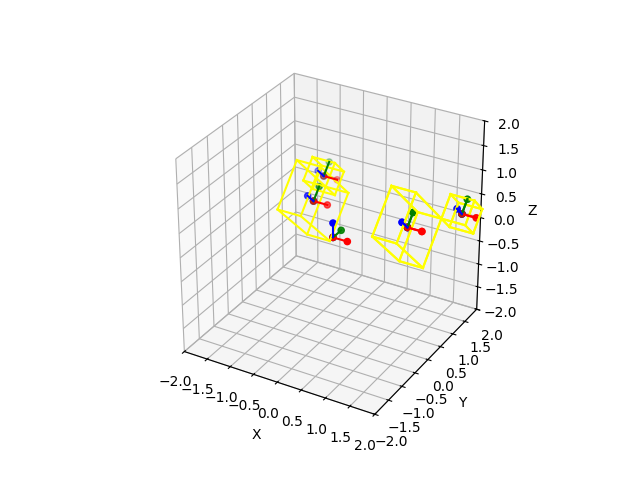

In [25]:
plt.close("all")

from tools.scene.box_node_3d import BoxNode3D
from tools.model.discrete_module_scene_node_3d import DiscreteModuleSceneNode3D



pos = component_position_matrix(
    x=1, y=1, z=0,
    angle_x=45, angle_y=0, mode='deg'
)
pos2 = component_position_matrix(
    x=0.5, y=0.75, z=-1,
    angle_x=0, angle_y=0, mode='deg'
)

source_system = CoordinateSystem3D.from_string("lub")
target_system = CoordinateSystem3D.from_string("rub")


cvpos = source_system.convert(target_system, pos)
cvpos2 = source_system.convert(target_system, pos2)

bbpos = target_system.convert(source_system, cvpos)
bbpos2 = target_system.convert(source_system, cvpos2)

world = DiscreteModuleSceneNode3D()
box = BoxNode3D(position=pos, size=[0.5, 1, 1.5])
box2 = BoxNode3D(position=pos2, size=[0.5, 0.5, 0.5])


world.add_scene_children(box)
box.add_scene_children(box2)


cvbox = BoxNode3D(position=cvpos, size=[0.5, 1, 1.5])
cvbox2 = BoxNode3D(position=cvpos2, size=[0.5, 0.5, 0.5])

world.add_scene_children(cvbox)
cvbox.add_scene_children(cvbox2)

bbbox = BoxNode3D(position=bbpos, size=[0.5, 1, 1.5])
bbbox2 = BoxNode3D(position=bbpos2, size=[0.5, 0.5, 0.5])

world.add_scene_children(bbbox)
bbbox.add_scene_children(bbbox2)

fig = world.plot_scene(
    plot_coordinate_systems=True,
    x_lim=[-2, 2],
    y_lim=[-2, 2],
    z_lim=[-2, 2],
    )


In [26]:
cvpos

array([[ 1.        ,  0.        ,  0.        , -1.        ],
       [ 0.        ,  0.70710677, -0.70710677,  1.        ],
       [ 0.        ,  0.70710677,  0.70710677,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)

In [20]:
cvpos2

array([[[-1.  ,  0.  ,  0.  , -0.5 ],
        [ 0.  ,  1.  ,  0.  ,  0.75],
        [ 0.  ,  0.  ,  1.  , -1.  ],
        [ 0.  ,  0.  ,  0.  ,  1.  ]]], dtype=float32)

In [15]:
cvpos.shape

(1, 4, 4)

In [14]:
waymo_system = CoordinateSystem3D.from_string("flu")
print(waymo_system.handiness)
waymo_system.get_permutation_matrix()

r


array([[ 0, -1,  0],
       [ 0,  0,  1],
       [-1,  0,  0]])

In [13]:
our_system = CoordinateSystem3D.from_string("rdf")
print(our_system.handiness)
our_system.get_permutation_matrix()

r


array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [15]:
np.linalg.inv(waymo_system.get_permutation_matrix()) @ our_system.get_permutation_matrix()

array([[ 0.,  0.,  1.],
       [-1.,  0.,  0.],
       [ 0., -1.,  0.]])

In [ ]:

waymo_system.convert(our_system, pos)